# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [85]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [86]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_80_run2/result-lstm-tcp80-hl2-seq4-do0.2-oov2500-part_5_Treatment_testing_80.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_80/part_5_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [87]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.8-51127-72.167.18.239-80-tcp,0.049528,0,0,0,26907.078571,0,0,0
1,192.168.10.19-57408-120.50.131.112-80-tcp,0.135878,1,0,0,146489.557604,0,0,0
2,192.168.10.5-55342-198.51.152.184-80-tcp,0.069042,0,0,0,127017.105618,0,0,0
3,192.168.10.14-49613-23.15.4.17-80-tcp,0.107463,0,0,0,38221.507553,0,0,0
4,192.168.10.19-51934-153.120.128.154-80-tcp,0.064795,0,0,0,40155.782135,0,0,0


In [88]:
df_truth.head()

,ID,Label
0,192.168.10.8-51127-72.167.18.239-80-tcp,BENIGN
1,192.168.10.19-57408-120.50.131.112-80-tcp,BENIGN
2,192.168.10.5-55342-198.51.152.184-80-tcp,BENIGN
3,192.168.10.14-49613-23.15.4.17-80-tcp,BENIGN
4,192.168.10.19-51934-153.120.128.154-80-tcp,BENIGN


In [89]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        24119
0         4955
Name: count, dtype: int64

## Exploratory Data Analysis

In [90]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        24119
0         4955
Name: count, dtype: int64

In [91]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           24053
0            5021
Name: count, dtype: int64

In [92]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [93]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [94]:
df_pred["id"]

0           192.168.10.8-51127-72.167.18.239-80-tcp
1         192.168.10.19-57408-120.50.131.112-80-tcp
2          192.168.10.5-55342-198.51.152.184-80-tcp
3             192.168.10.14-49613-23.15.4.17-80-tcp
4        192.168.10.19-51934-153.120.128.154-80-tcp
                            ...                    
29069     192.168.10.15-51988-192.35.249.124-80-tcp
29070      192.168.10.15-52546-199.244.50.75-80-tcp
29071       192.168.10.8-57052-107.22.219.96-80-tcp
29072         172.16.0.1-53312-192.168.10.50-80-tcp
29073         172.16.0.1-42034-192.168.10.50-80-tcp
Name: id, Length: 29074, dtype: object

In [95]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0           192.168.10.8-51127-72.167.18.239-80-tcp
1         192.168.10.19-57408-120.50.131.112-80-tcp
2          192.168.10.5-55342-198.51.152.184-80-tcp
3             192.168.10.14-49613-23.15.4.17-80-tcp
4        192.168.10.19-51934-153.120.128.154-80-tcp
                            ...                    
29069     192.168.10.15-51988-192.35.249.124-80-tcp
29070      192.168.10.15-52546-199.244.50.75-80-tcp
29071       192.168.10.8-57052-107.22.219.96-80-tcp
29072         172.16.0.1-53312-192.168.10.50-80-tcp
29073         172.16.0.1-42034-192.168.10.50-80-tcp
Name: ID, Length: 29074, dtype: object

In [96]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [97]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [98]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
6248,172.16.0.1-45540-192.168.10.50-80-tcp,0.514286,1,1,1,265261.236220,1,1,0,1
6249,172.16.0.1-45540-192.168.10.50-80-tcp,0.514286,1,1,1,265261.236220,1,1,0,1
6250,172.16.0.1-45540-192.168.10.50-80-tcp,0.514286,1,1,1,265261.236220,1,1,0,1
6251,172.16.0.1-57386-192.168.10.50-80-tcp,0.547988,1,1,1,272757.492163,1,1,0,1
6252,172.16.0.1-57386-192.168.10.50-80-tcp,0.547988,1,1,1,272757.492163,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
71401,172.16.0.1-53312-192.168.10.50-80-tcp,0.524064,1,1,1,277975.516216,1,1,0,1
71402,172.16.0.1-53312-192.168.10.50-80-tcp,0.524064,1,1,1,277975.516216,1,1,0,1
71403,172.16.0.1-42034-192.168.10.50-80-tcp,0.566952,1,1,1,247741.351585,1,0,0,1
71404,172.16.0.1-42034-192.168.10.50-80-tcp,0.566952,1,1,1,247741.351585,1,0,0,1


In [99]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.8-51127-72.167.18.239-80-tcp,0.049528,0,0,0,26907.078571,0,0,0,0
1,192.168.10.19-57408-120.50.131.112-80-tcp,0.135878,1,0,0,146489.557604,0,0,0,0
2,192.168.10.5-55342-198.51.152.184-80-tcp,0.069042,0,0,0,127017.105618,0,0,0,0
3,192.168.10.14-49613-23.15.4.17-80-tcp,0.107463,0,0,0,38221.507553,0,0,0,0
4,192.168.10.19-51934-153.120.128.154-80-tcp,0.064795,0,0,0,40155.782135,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71395,192.168.10.15-51988-192.35.249.124-80-tcp,0.038666,0,0,0,118728.863901,0,0,0,0
71396,192.168.10.15-51988-192.35.249.124-80-tcp,0.038666,0,0,0,118728.863901,0,0,0,0
71397,192.168.10.15-51988-192.35.249.124-80-tcp,0.038666,0,0,0,118728.863901,0,0,0,0
71398,192.168.10.15-52546-199.244.50.75-80-tcp,0.100336,0,0,0,122684.607303,0,0,0,0


In [100]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.8-51127-72.167.18.239-80-tcp,0.049528,0,0,0,26907.078571,0,0,0,0
1,192.168.10.19-57408-120.50.131.112-80-tcp,0.135878,1,0,0,146489.557604,0,0,0,0
2,192.168.10.5-55342-198.51.152.184-80-tcp,0.069042,0,0,0,127017.105618,0,0,0,0
3,192.168.10.14-49613-23.15.4.17-80-tcp,0.107463,0,0,0,38221.507553,0,0,0,0
4,192.168.10.19-51934-153.120.128.154-80-tcp,0.064795,0,0,0,40155.782135,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71401,172.16.0.1-53312-192.168.10.50-80-tcp,0.524064,1,1,1,277975.516216,1,1,0,1
71402,172.16.0.1-53312-192.168.10.50-80-tcp,0.524064,1,1,1,277975.516216,1,1,0,1
71403,172.16.0.1-42034-192.168.10.50-80-tcp,0.566952,1,1,1,247741.351585,1,0,0,1
71404,172.16.0.1-42034-192.168.10.50-80-tcp,0.566952,1,1,1,247741.351585,1,0,0,1


In [101]:
df_pred[['Label']].value_counts()

Label
1        61673
0         9733
Name: count, dtype: int64

In [102]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [103]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [104]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
71401,1
71402,1
71403,1
71404,1


### Detection Rate

In [105]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.9991568433512233
Recall-Binary-b_iqr: 0.9984920467627649
Recall-Binary-b_zscore: 0.99730838454429
Recall-Floating-f_mean: 0.7887892594814586
Recall-Floating-f_iqr: 0.4929709921683719
Recall-Floating-f_zscore: 0.10263810743761452


### Confussion Matrix

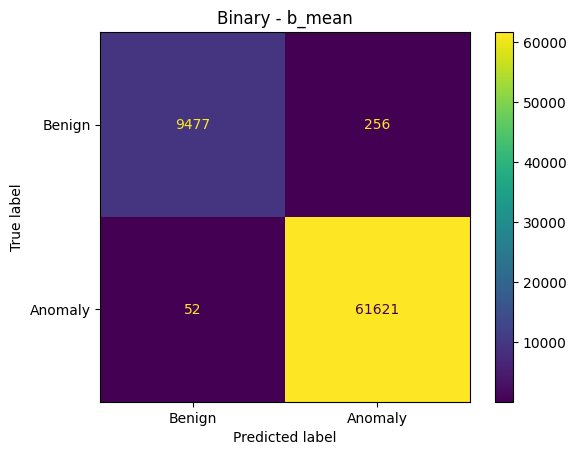

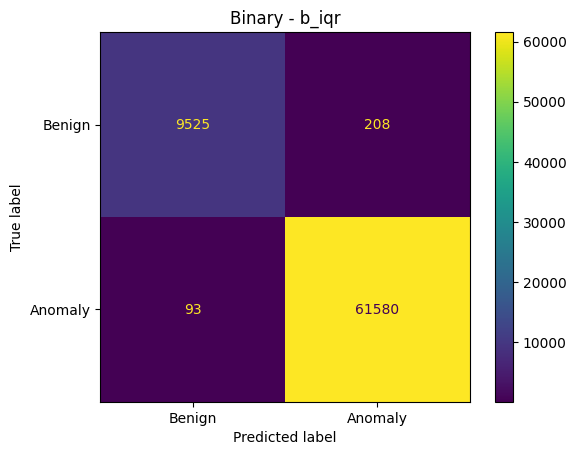

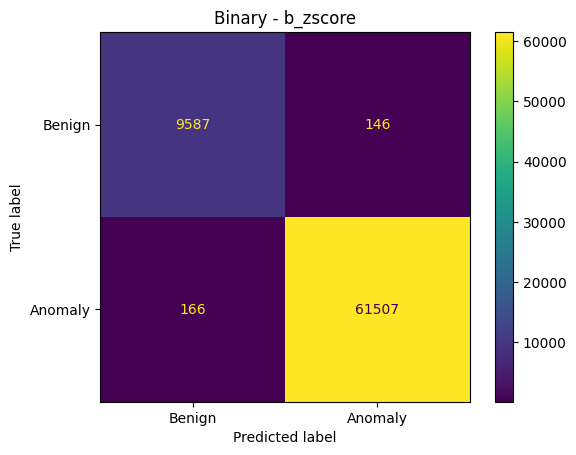

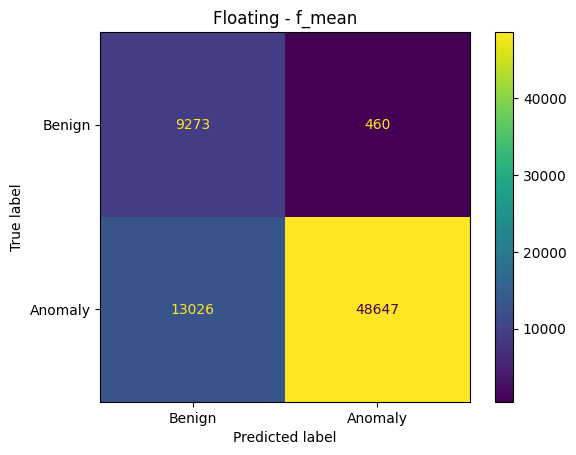

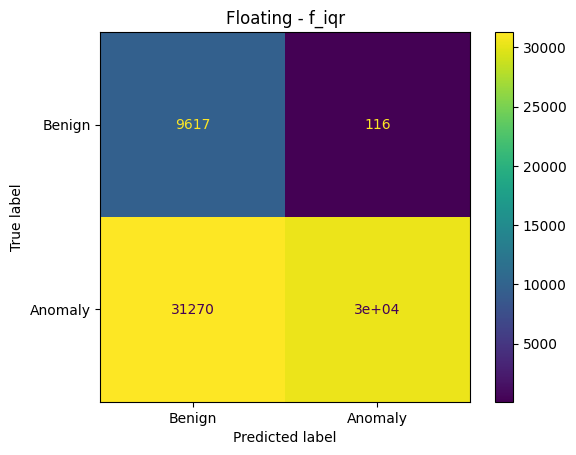

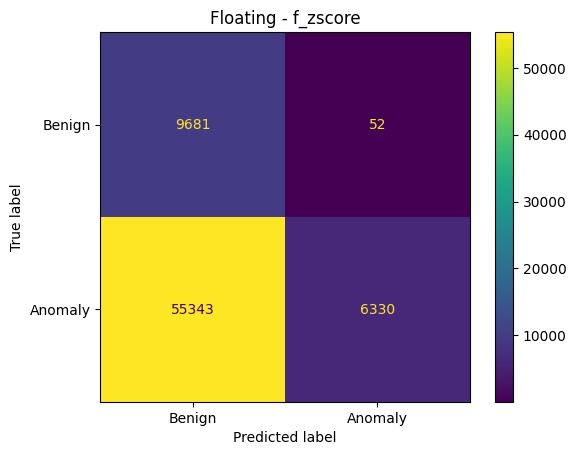

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [107]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.9984962844614981
F2-Binary-b_iqr: 0.9981198132780082
F2-Binary-b_zscore: 0.9973730723702346
F2-Floating-f_mean: 0.8222982498250501
F2-Floating-f_iqr: 0.5483729000652933
F2-Floating-f_zscore: 0.12506223476137415


### FPR Score

In [108]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.02630227062570636
FPR-Binary-b_iqr: 0.021370594883386416
FPR-Binary-b_zscore: 0.015000513716223159
FPR-Floating-f_mean: 0.04726189253056612
FPR-Floating-f_iqr: 0.011918216377273194
FPR-Floating-f_zscore: 0.005342648720846604


In [109]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.9956866369772848
Accuracy-Binary-b_iqr: 0.9957846679550738
Accuracy-Binary-b_zscore: 0.9956306192756911
Accuracy-Floating-f_mean: 0.8111363190768283
Accuracy-Floating-f_iqr: 0.5604571044450046
Accuracy-Floating-f_zscore: 0.22422485505419712


In [110]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.999157,0.998496,0.026302,0.995687
b_iqr,0.998492,0.998120,0.021371,0.995785
b_zscore,0.997308,0.997373,0.015001,0.995631
f_mean,0.788789,0.822298,0.047262,0.811136
f_iqr,0.492971,0.548373,0.011918,0.560457
f_zscore,0.102638,0.125062,0.005343,0.224225


In [111]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [112]:
# %pip install openpyxl